In [49]:
import pandas as pd
import numpy as np
import os 
import warnings; warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"ㄴㄴ

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from pycaret.regression import *

## 데이터 로드 및 전처리

In [42]:
data=pd.read_csv("음수처리_label.csv", index_col = 0)
data=data.drop(['term','artist','title'],axis=1, inplace=False)
data.head()

,rank,LIKE,replies,first_cnt,rel_chartin,rel_term,season,is_kor,title_len,previous_rank,sex,act_type,chartin_cnt,fan_반올림,main_genre
45,46,128872,122,0,30,30,겨울,0,37,50,혼성,콜라보,1,1000,POP
95,46,128872,122,0,30,37,겨울,0,37,46,혼성,콜라보,1,1000,POP
639,40,322275,527,0,30,30,봄,0,10,50,남성,솔로,2,115000,POP
648,49,277625,227,0,506,506,봄,0,12,50,남성,솔로,3,88000,POP
686,37,322275,527,0,30,37,봄,0,10,40,남성,솔로,2,115000,POP


In [15]:
data.info()
#결측치 채워놓은 데이터로 진행
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14350 entries, 45 to 8098
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           14350 non-null  int64 
 1   LIKE           14350 non-null  int64 
 2   replies        14350 non-null  int64 
 3   first_cnt      14350 non-null  int64 
 4   rel_chartin    14350 non-null  int64 
 5   rel_term       14350 non-null  int64 
 6   season         14350 non-null  object
 7   is_kor         14350 non-null  int64 
 8   title_len      14350 non-null  int64 
 9   previous_rank  14350 non-null  int64 
 10  sex            14350 non-null  object
 11  act_type       14350 non-null  object
 12  chartin_cnt    14350 non-null  int64 
 13  fan_반올림        14350 non-null  int64 
 14  main_genre     14350 non-null  object
dtypes: int64(11), object(4)
memory usage: 1.8+ MB


,rank,LIKE,replies,first_cnt,rel_chartin,rel_term,is_kor,title_len,previous_rank,chartin_cnt,fan_반올림
count,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000
mean,25.500000,182799.919861,1945.995261,0.803693,106.430941,231.558049,0.661463,10.916376,23.968293,11.143554,195615.798118
std,14.431373,101863.538589,2999.576929,1.739459,502.184820,535.885429,0.473228,8.632126,14.417364,14.699789,245873.933524
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000
25%,13.000000,112182.000000,468.250000,0.000000,4.000000,39.000000,0.000000,5.000000,11.000000,2.000000,41000.000000
50%,25.500000,165700.000000,1003.000000,0.000000,7.000000,95.000000,1.000000,8.000000,24.000000,5.000000,103000.000000
75%,38.000000,232211.000000,2176.000000,1.000000,18.000000,221.000000,1.000000,14.000000,36.000000,12.000000,222000.000000
max,50.000000,563839.000000,30383.000000,11.000000,6305.000000,6452.000000,1.000000,54.000000,50.000000,51.000000,797000.000000


- 데이터 분포 불균등하므로 로그 스케일링 후 스케일러를 한번 더 사용하여 완화시키려고 함

In [16]:
log_list = ['LIKE', 'replies', 'rel_chartin', 'rel_term', 
            'title_len', 'previous_rank', 'chartin_cnt', 'fan_반올림']
numerical = ['LIKE', 'replies', 'first_cnt', 'rel_chartin',
             'rel_term', 'title_len', 'previous_rank', 'chartin_cnt', 'fan_반올림']
categorical = ['is_kor', 'season', 'sex', 'act_type', 'main_genre']

In [20]:
data1=data.copy()
for i in log_list:
    data1[i]=data1[i].apply(lambda x : np.log1p(x))

In [18]:
data1.describe()

,rank,LIKE,replies,first_cnt,rel_chartin,rel_term,is_kor,title_len,previous_rank,chartin_cnt,fan_반올림
count,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000,14350.000000
mean,25.500000,11.952183,6.929189,0.803693,2.529305,4.518345,0.661463,2.246453,2.960740,1.922025,11.401886
std,14.431373,0.609375,1.109476,1.739459,1.537019,1.354557,0.473228,0.677733,0.828651,1.028258,1.450298
min,1.000000,0.000000,3.091042,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,1.609438
25%,13.000000,11.627887,6.151135,0.000000,1.609438,3.688879,0.000000,1.791759,2.484907,1.098612,10.621352
50%,25.500000,12.017940,6.911747,0.000000,2.079442,4.564348,1.000000,2.197225,3.218876,1.791759,11.542494
75%,38.000000,12.355406,7.685703,1.000000,2.944439,5.402677,1.000000,2.708050,3.610918,2.564949,12.310437
max,50.000000,13.242526,10.321671,11.000000,8.749257,8.772300,1.000000,4.007333,3.931826,3.951244,13.588611


In [21]:
data_stan=data1.copy()
scaler = StandardScaler()
data_stan[numerical] = scaler.fit_transform(data_stan[numerical])

In [29]:
data_norm=data1.copy()
scaler = MinMaxScaler()
data_norm[numerical] = scaler.fit_transform(data_norm[numerical])

## autoML
### 1. with Standard scaler

In [24]:
exp = setup(data_stan, target='rank', train_size = 0.7, 
            remove_multicollinearity = True, categorical_features=categorical,
            feature_selection = True)

,Description,Value
0,session_id,4108
1,Target,rank
2,Original Data,"(14350, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10044, 31)"


In [25]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,3.1248,26.3326,5.1221,0.8736,0.2715,0.2382,2.3150
lightgbm,Light Gradient Boosting Machine,3.2308,28.2464,5.3060,0.8644,0.2884,0.2550,0.1600
xgboost,Extreme Gradient Boosting,3.2133,28.9495,5.3720,0.8610,0.2885,0.2485,1.2980
rf,Random Forest Regressor,3.3790,30.6424,5.5249,0.8530,0.2982,0.2690,1.9750
et,Extra Trees Regressor,3.5873,33.1861,5.7568,0.8406,0.3125,0.2936,2.1200
gbr,Gradient Boosting Regressor,3.6368,34.7053,5.8834,0.8334,0.3365,0.3299,0.6810
dt,Decision Tree Regressor,4.4408,55.1221,7.4172,0.7351,0.3843,0.3244,0.0770
knn,K Neighbors Regressor,5.1642,57.3376,7.5651,0.7246,0.3860,0.3997,0.0980
ada,AdaBoost Regressor,7.2735,81.0002,8.9888,0.6111,0.6138,0.9503,0.4050
ridge,Ridge Regression,6.6436,81.2231,9.0050,0.6098,0.5133,0.6202,0.0300


오오오오오오오
### 가장 성능이 좋았던 세 모델로 kfold 진행

### catboost tuning

In [30]:
model = create_model('catboost') 
tuned = tune_model(model, optimize='RMSE', n_iter= 50) 
final_model = finalize_model(tuned)

final_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1328,26.0694,5.1058,0.8728,0.2735,0.2370
1,3.2533,28.1716,5.3077,0.8664,0.2851,0.2398
2,3.0121,25.0213,5.0021,0.8778,0.2458,0.1997
3,3.3656,32.4619,5.6975,0.8463,0.2943,0.2521
4,3.0440,25.3615,5.0360,0.8752,0.2940,0.2859
5,3.1379,26.5112,5.1489,0.8763,0.3013,0.3050
6,3.0922,23.7692,4.8754,0.8851,0.2715,0.2280
7,3.0692,22.6624,4.7605,0.8887,0.2684,0.2279
8,3.1725,27.0860,5.2044,0.8697,0.2710,0.2259


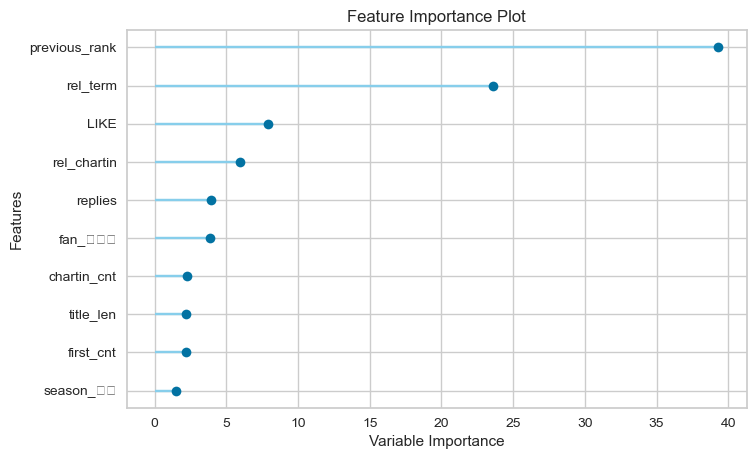

In [31]:
plot_model(final_model, plot='feature')

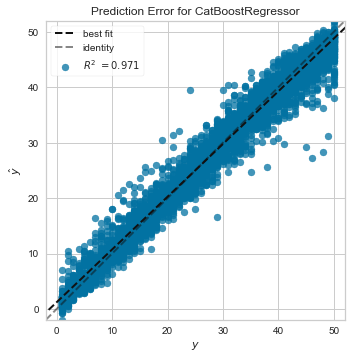

In [32]:
plot_model(final_model, plot = 'error')

### lgbm tuning

In [26]:
model = create_model('lightgbm') .
tuned = tune_model(model, optimize='RMSE', n_iter= 50) 
final_model = finalize_model(tuned)

final_model 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2863,26.3617,5.1344,0.8714,0.2813,0.2396
1,3.3720,28.9152,5.3773,0.8629,0.2953,0.2714
2,3.2345,25.6387,5.0635,0.8747,0.2799,0.2515
3,3.4591,32.1317,5.6685,0.8479,0.3033,0.2612
4,3.1953,25.7699,5.0764,0.8732,0.2984,0.3051
5,3.1879,25.9535,5.0945,0.8789,0.3161,0.3297
6,3.1021,22.6419,4.7584,0.8905,0.2620,0.2139
7,3.2463,24.1961,4.9190,0.8812,0.2819,0.2457
8,3.3455,28.8943,5.3753,0.8610,0.3176,0.2618


LGBMRegressor(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=200, n_jobs=-1, num_leaves=90, objective=None,
              random_state=4108, reg_alpha=4, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

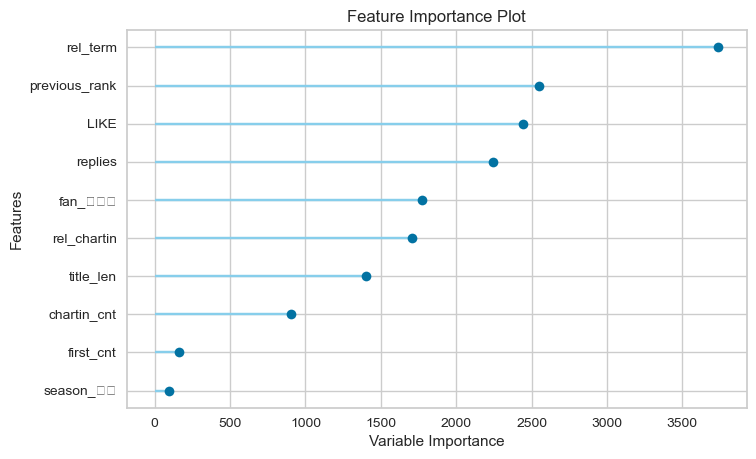

In [27]:
plot_model(final_model, plot='feature')

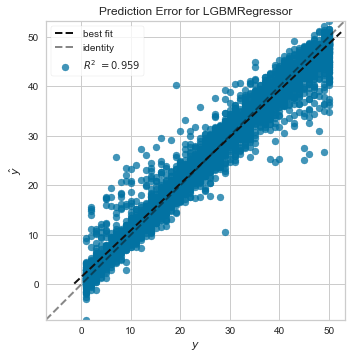

In [28]:
plot_model(final_model, plot = 'error')

### xgbt tuning

In [33]:
model = create_model('xgboost') 
tuned = tune_model(model, optimize='RMSE', n_iter= 50) 
final_model = finalize_model(tuned)

final_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1088,24.7253,4.9725,0.8793,0.2628,0.2225
1,3.3727,29.1413,5.3983,0.8618,0.2919,0.2625
2,3.2414,26.8916,5.1857,0.8686,0.2734,0.2364
3,3.3626,32.4092,5.6929,0.8466,0.2766,0.2219
4,3.2494,25.8991,5.0891,0.8725,0.2945,0.2808
5,3.1701,26.8013,5.1770,0.8749,0.3016,0.2818
6,3.1524,23.4498,4.8425,0.8866,0.2730,0.2301
7,3.1556,22.8364,4.7787,0.8879,0.2640,0.2222
8,3.1892,26.6560,5.1629,0.8717,0.2700,0.2179


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=130, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4108, reg_alpha=0.4,
             reg_lambda=10, scale_pos_weight=40.900000000000006, subsample=1,
             tree_method='auto', validate_parameters=1, verbosity=0)

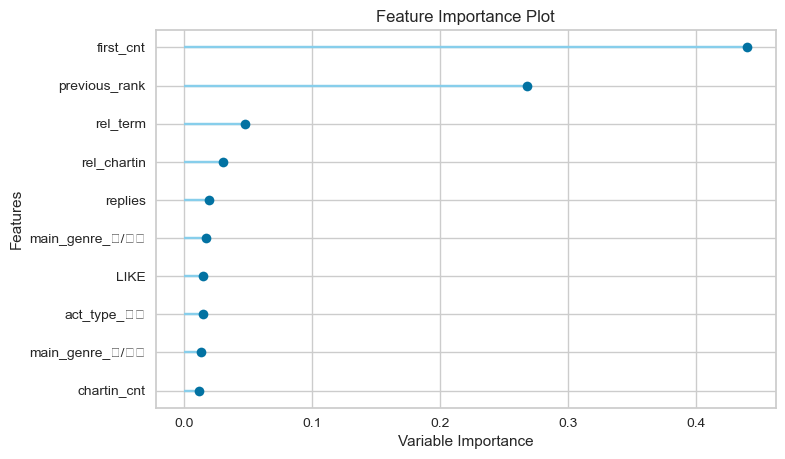

In [34]:
plot_model(final_model, plot='feature')

- 피처 중요도가 별로임

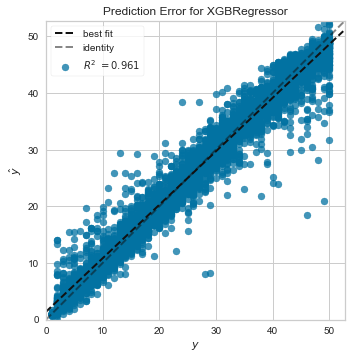

In [35]:
plot_model(final_model, plot = 'error')

- log scaling + standard scaling으로도 rmse&r2 좋은 결과!!!!!!!!!!!!!!! 

### 2. with Minmax scaler

In [36]:
exp = setup(data_norm, target='rank', train_size = 0.7, 
            remove_multicollinearity = True, categorical_features=categorical,
            feature_selection = True)

,Description,Value
0,session_id,4803
1,Target,rank
2,Original Data,"(14350, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10044, 31)"


In [37]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,3.1319,26.6736,5.1618,0.8724,0.2743,0.2395,3.3230
lightgbm,Light Gradient Boosting Machine,3.2174,28.1503,5.3017,0.8654,0.2847,0.2531,0.2310
xgboost,Extreme Gradient Boosting,3.1977,28.4164,5.3271,0.8640,0.2848,0.2433,1.5770
rf,Random Forest Regressor,3.3764,30.5929,5.5285,0.8536,0.2968,0.2662,3.1270
et,Extra Trees Regressor,3.5747,32.8525,5.7275,0.8429,0.3138,0.2976,2.6490
gbr,Gradient Boosting Regressor,3.6566,34.2677,5.8491,0.8361,0.3395,0.3388,0.9600
dt,Decision Tree Regressor,4.3837,53.1892,7.2913,0.7455,0.3744,0.3043,0.0830
knn,K Neighbors Regressor,5.4835,68.7365,8.2840,0.6709,0.4416,0.4853,0.2140
ada,AdaBoost Regressor,6.9201,75.1367,8.6596,0.6407,0.5904,0.8864,0.4530
lar,Least Angle Regression,6.6035,80.2783,8.9560,0.6156,0.5151,0.6300,0.0270


- catboost는 스탠다드 결과가 더 좋으나 lgbm,xgbt은 minmax가 결과가 미세하게 좋음

### catboost tuning

In [60]:
model = create_model('catboost') 
tuned = tune_model(model, optimize='RMSE', n_iter= 50) 
final_model = finalize_model(tuned)

final_model 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2434,28.4723,5.3359,0.8697,0.2511,0.2094
1,3.1551,26.0544,5.1044,0.8704,0.2829,0.2393
2,3.3692,32.1218,5.6676,0.8501,0.2936,0.2529
3,3.1481,27.0320,5.1992,0.8714,0.2930,0.2810
4,3.2585,28.0870,5.2997,0.8700,0.2838,0.2562
5,3.1241,26.4711,5.1450,0.8680,0.2779,0.2621
6,3.0698,25.7470,5.0742,0.8698,0.2787,0.2488
7,3.1605,27.4304,5.2374,0.8752,0.2700,0.2323
8,3.1144,27.0593,5.2019,0.8672,0.2650,0.2293


- 피팅 파라미터가 안 나오는게 내 컴퓨터가 문제인지 모르겠넴....  
찾아보니 catboost는 파라미터 조정이 별로 필요없는 편인것 같긴함

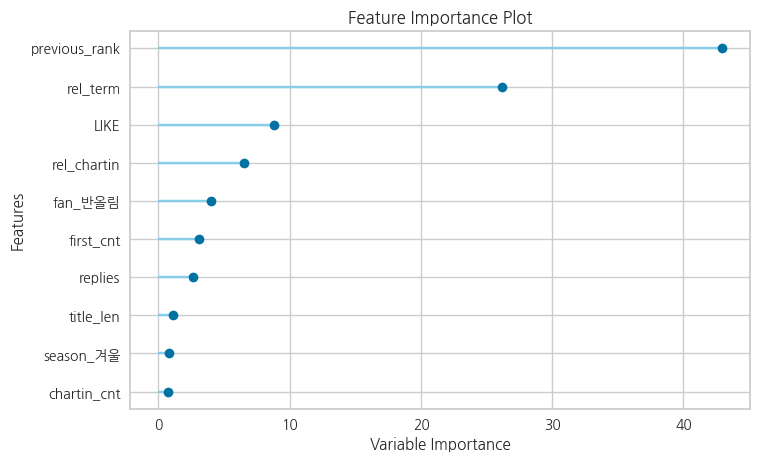

In [61]:
plot_model(final_model, plot='feature')

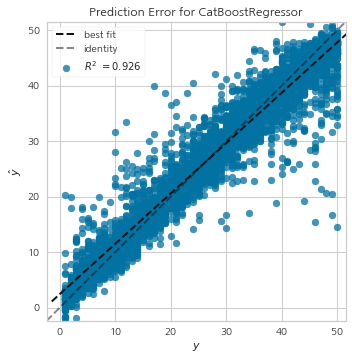

In [62]:
plot_model(final_model, plot = 'error')

### lgbm tuning

In [51]:
model = create_model('lightgbm') 
tuned = tune_model(model, optimize='RMSE', n_iter= 50) 
final_model = finalize_model(tuned)

final_model 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3289,28.0774,5.2988,0.8716,0.2814,0.2343
1,3.1886,25.6187,5.0615,0.8726,0.2865,0.2378
2,3.4471,30.7499,5.5453,0.8565,0.2928,0.2539
3,3.3177,27.3560,5.2303,0.8699,0.3175,0.3176
4,3.2755,27.4449,5.2388,0.8729,0.2942,0.2764
5,3.1612,25.6270,5.0623,0.8722,0.2938,0.2914
6,3.1239,25.0806,5.0081,0.8732,0.2754,0.2498
7,3.3108,29.0231,5.3873,0.8680,0.2899,0.2503
8,3.1388,25.3772,5.0376,0.8754,0.2708,0.2361


LGBMRegressor(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=16, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=180, n_jobs=-1, num_leaves=60, objective=None,
              random_state=4803, reg_alpha=0.2, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

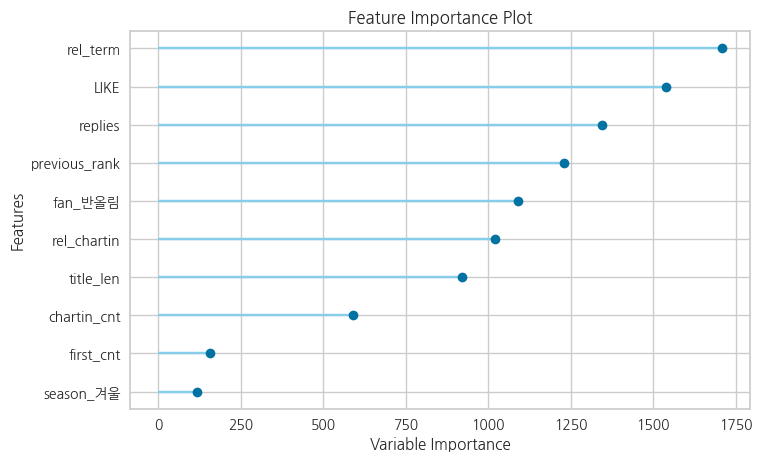

In [52]:
plot_model(final_model, plot='feature')

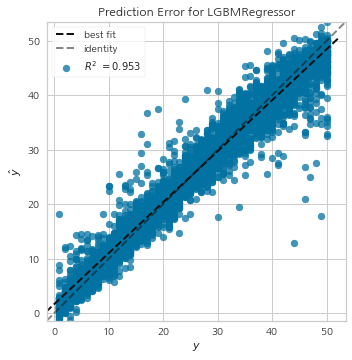

In [53]:
plot_model(final_model, plot = 'error')

### xgbt tuning

In [56]:
model = create_model('xgboost') 
tuned = tune_model(model, optimize='RMSE', n_iter= 50) 
final_model = finalize_model(tuned)

final_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2233,27.3900,5.2335,0.8747,0.2599,0.2079
1,3.1450,25.3861,5.0385,0.8737,0.2956,0.2626
2,3.4062,30.3667,5.5106,0.8583,0.2868,0.2545
3,3.2376,26.0921,5.1080,0.8759,0.3114,0.3093
4,3.2413,26.3896,5.1371,0.8778,0.2851,0.2725
5,3.0709,24.6734,4.9672,0.8770,0.2849,0.2716
6,3.0545,23.8636,4.8850,0.8793,0.2587,0.2256
7,3.2246,26.3112,5.1294,0.8803,0.2642,0.2316
8,3.0948,23.9718,4.8961,0.8823,0.2736,0.2447


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=290, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4803, reg_alpha=4,
             reg_lambda=3, scale_pos_weight=9.700000000000003, subsample=0.9,
             tree_method='auto', validate_parameters=1, verbosity=0)

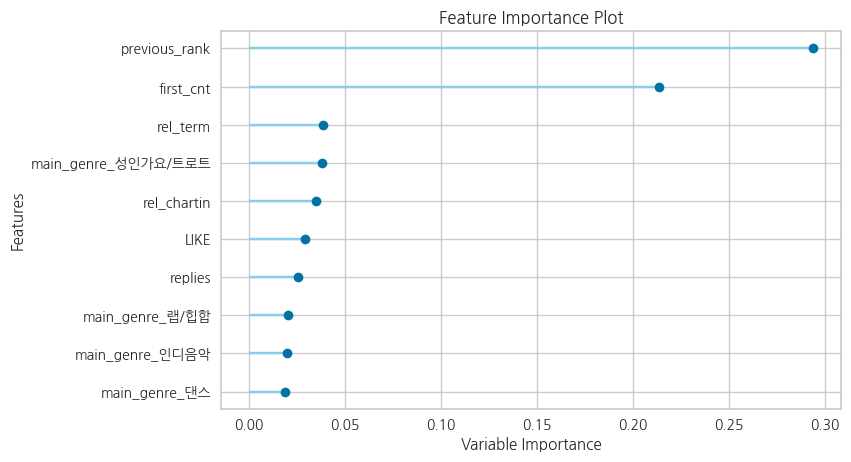

In [57]:
plot_model(final_model, plot='feature')

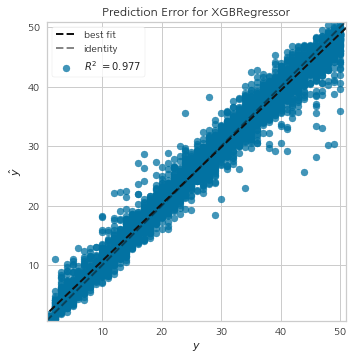

In [58]:
plot_model(final_model, plot = 'error')

## 단일 모델 

In [43]:
data_dum = pd.get_dummies(data, columns=categorical)
data_dum.head()

,rank,LIKE,replies,first_cnt,rel_chartin,rel_term,title_len,previous_rank,chartin_cnt,fan_반올림,...,main_genre_국내드라마,main_genre_댄스,main_genre_랩/힙합,main_genre_록/메탈,main_genre_발라드,main_genre_성인가요/트로트,main_genre_인디음악,main_genre_일렉트로니카,main_genre_재즈,main_genre_포크/블루스
45,46,128872,122,0,30,30,37,50,1,1000,...,0,0,0,0,0,0,0,0,0,0
95,46,128872,122,0,30,37,37,46,1,1000,...,0,0,0,0,0,0,0,0,0,0
639,40,322275,527,0,30,30,10,50,2,115000,...,0,0,0,0,0,0,0,0,0,0
648,49,277625,227,0,506,506,12,50,3,88000,...,0,0,0,0,0,0,0,0,0,0
686,37,322275,527,0,30,37,10,40,2,115000,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#data_dum[log_list] = np.log(data_dum[log_list])

In [44]:
X = data_dum.drop(['rank'], axis=1)
y = data_dum['rank']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1234,shuffle=False) 

In [73]:
X_test.columns

Index(['LIKE', 'replies', 'first_cnt', 'rel_chartin', 'rel_term', 'title_len',
       'previous_rank', 'chartin_cnt', 'fan_반올림', 'is_kor_0', 'is_kor_1',
       'season_가을', 'season_겨울', 'season_봄', 'season_여름', 'sex_남성', 'sex_여성',
       'sex_혼성', 'act_type_그룹', 'act_type_솔로', 'act_type_콜라보',
       'main_genre_POP', 'main_genre_R&B/Soul', 'main_genre_국내드라마',
       'main_genre_댄스', 'main_genre_랩/힙합', 'main_genre_록/메탈', 'main_genre_발라드',
       'main_genre_성인가요/트로트', 'main_genre_인디음악', 'main_genre_일렉트로니카',
       'main_genre_재즈', 'main_genre_포크/블루스'],
      dtype='object')

### cat 더미즈만 한 데이터 최적 파라미터로 돌려보면?
- standard/minmax 모두 파라미터 없게 나와서 쌩으로 진행

In [101]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()

cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

Learning rate set to 0.058951
0:	learn: 13.8310180	total: 4.09ms	remaining: 4.08s
1:	learn: 13.2587232	total: 7.61ms	remaining: 3.8s
2:	learn: 12.7283926	total: 10.7ms	remaining: 3.56s
3:	learn: 12.2403171	total: 13.1ms	remaining: 3.27s
4:	learn: 11.7960570	total: 15.7ms	remaining: 3.12s
5:	learn: 11.3628941	total: 18.5ms	remaining: 3.06s
6:	learn: 10.9702071	total: 21.6ms	remaining: 3.07s
7:	learn: 10.6234529	total: 24.8ms	remaining: 3.07s
8:	learn: 10.2880536	total: 29ms	remaining: 3.19s
9:	learn: 10.0009824	total: 31.9ms	remaining: 3.16s
10:	learn: 9.7047602	total: 35.1ms	remaining: 3.16s
11:	learn: 9.4524094	total: 38.3ms	remaining: 3.15s
12:	learn: 9.2063476	total: 41.9ms	remaining: 3.18s
13:	learn: 8.9721067	total: 45.1ms	remaining: 3.18s
14:	learn: 8.7638862	total: 48.2ms	remaining: 3.16s
15:	learn: 8.5592602	total: 51.2ms	remaining: 3.15s
16:	learn: 8.3776915	total: 54.7ms	remaining: 3.17s
17:	learn: 8.2134650	total: 57.7ms	remaining: 3.15s
18:	learn: 8.0574603	total: 60.9ms	re

199:	learn: 5.0490731	total: 686ms	remaining: 2.74s
200:	learn: 5.0431810	total: 690ms	remaining: 2.74s
201:	learn: 5.0390587	total: 693ms	remaining: 2.74s
202:	learn: 5.0356683	total: 696ms	remaining: 2.73s
203:	learn: 5.0315607	total: 700ms	remaining: 2.73s
204:	learn: 5.0287436	total: 703ms	remaining: 2.73s
205:	learn: 5.0268613	total: 706ms	remaining: 2.72s
206:	learn: 5.0217456	total: 710ms	remaining: 2.72s
207:	learn: 5.0178998	total: 713ms	remaining: 2.72s
208:	learn: 5.0162985	total: 717ms	remaining: 2.71s
209:	learn: 5.0131477	total: 720ms	remaining: 2.71s
210:	learn: 5.0052243	total: 724ms	remaining: 2.71s
211:	learn: 4.9991437	total: 728ms	remaining: 2.7s
212:	learn: 4.9929225	total: 731ms	remaining: 2.7s
213:	learn: 4.9883227	total: 734ms	remaining: 2.69s
214:	learn: 4.9867466	total: 737ms	remaining: 2.69s
215:	learn: 4.9846357	total: 739ms	remaining: 2.68s
216:	learn: 4.9816955	total: 742ms	remaining: 2.68s
217:	learn: 4.9789695	total: 745ms	remaining: 2.67s
218:	learn: 4.

386:	learn: 4.3911220	total: 1.19s	remaining: 1.88s
387:	learn: 4.3875610	total: 1.19s	remaining: 1.87s
388:	learn: 4.3853419	total: 1.19s	remaining: 1.87s
389:	learn: 4.3819984	total: 1.19s	remaining: 1.87s
390:	learn: 4.3798129	total: 1.2s	remaining: 1.86s
391:	learn: 4.3772201	total: 1.2s	remaining: 1.86s
392:	learn: 4.3749893	total: 1.2s	remaining: 1.86s
393:	learn: 4.3716676	total: 1.2s	remaining: 1.85s
394:	learn: 4.3693455	total: 1.21s	remaining: 1.85s
395:	learn: 4.3678731	total: 1.21s	remaining: 1.84s
396:	learn: 4.3663557	total: 1.21s	remaining: 1.84s
397:	learn: 4.3623783	total: 1.22s	remaining: 1.84s
398:	learn: 4.3616958	total: 1.22s	remaining: 1.83s
399:	learn: 4.3579764	total: 1.22s	remaining: 1.83s
400:	learn: 4.3569032	total: 1.22s	remaining: 1.83s
401:	learn: 4.3532147	total: 1.23s	remaining: 1.82s
402:	learn: 4.3516103	total: 1.23s	remaining: 1.82s
403:	learn: 4.3495170	total: 1.23s	remaining: 1.81s
404:	learn: 4.3460178	total: 1.23s	remaining: 1.81s
405:	learn: 4.34

560:	learn: 4.0477314	total: 1.68s	remaining: 1.32s
561:	learn: 4.0472572	total: 1.69s	remaining: 1.31s
562:	learn: 4.0458784	total: 1.69s	remaining: 1.31s
563:	learn: 4.0455593	total: 1.69s	remaining: 1.31s
564:	learn: 4.0445663	total: 1.69s	remaining: 1.3s
565:	learn: 4.0425898	total: 1.7s	remaining: 1.3s
566:	learn: 4.0403042	total: 1.7s	remaining: 1.3s
567:	learn: 4.0391192	total: 1.7s	remaining: 1.29s
568:	learn: 4.0379438	total: 1.71s	remaining: 1.29s
569:	learn: 4.0350803	total: 1.71s	remaining: 1.29s
570:	learn: 4.0334927	total: 1.72s	remaining: 1.29s
571:	learn: 4.0317318	total: 1.72s	remaining: 1.29s
572:	learn: 4.0299651	total: 1.72s	remaining: 1.28s
573:	learn: 4.0285238	total: 1.72s	remaining: 1.28s
574:	learn: 4.0271052	total: 1.73s	remaining: 1.28s
575:	learn: 4.0252795	total: 1.73s	remaining: 1.27s
576:	learn: 4.0224882	total: 1.73s	remaining: 1.27s
577:	learn: 4.0197007	total: 1.74s	remaining: 1.27s
578:	learn: 4.0176383	total: 1.74s	remaining: 1.26s
579:	learn: 4.0157

743:	learn: 3.7560492	total: 2.19s	remaining: 753ms
744:	learn: 3.7550380	total: 2.19s	remaining: 750ms
745:	learn: 3.7538176	total: 2.19s	remaining: 747ms
746:	learn: 3.7525037	total: 2.19s	remaining: 744ms
747:	learn: 3.7517704	total: 2.2s	remaining: 741ms
748:	learn: 3.7493029	total: 2.2s	remaining: 738ms
749:	learn: 3.7479997	total: 2.2s	remaining: 735ms
750:	learn: 3.7456650	total: 2.21s	remaining: 732ms
751:	learn: 3.7441940	total: 2.21s	remaining: 728ms
752:	learn: 3.7431388	total: 2.21s	remaining: 726ms
753:	learn: 3.7428699	total: 2.21s	remaining: 722ms
754:	learn: 3.7419525	total: 2.22s	remaining: 719ms
755:	learn: 3.7403633	total: 2.22s	remaining: 716ms
756:	learn: 3.7393825	total: 2.22s	remaining: 713ms
757:	learn: 3.7385378	total: 2.22s	remaining: 710ms
758:	learn: 3.7383883	total: 2.23s	remaining: 707ms
759:	learn: 3.7377602	total: 2.23s	remaining: 704ms
760:	learn: 3.7365821	total: 2.23s	remaining: 701ms
761:	learn: 3.7350278	total: 2.23s	remaining: 698ms
762:	learn: 3.7

908:	learn: 3.5574344	total: 2.68s	remaining: 268ms
909:	learn: 3.5564571	total: 2.68s	remaining: 265ms
910:	learn: 3.5545851	total: 2.69s	remaining: 262ms
911:	learn: 3.5532324	total: 2.69s	remaining: 259ms
912:	learn: 3.5514374	total: 2.69s	remaining: 257ms
913:	learn: 3.5497858	total: 2.69s	remaining: 254ms
914:	learn: 3.5489900	total: 2.7s	remaining: 251ms
915:	learn: 3.5483692	total: 2.7s	remaining: 248ms
916:	learn: 3.5466461	total: 2.7s	remaining: 245ms
917:	learn: 3.5458446	total: 2.7s	remaining: 242ms
918:	learn: 3.5440706	total: 2.71s	remaining: 239ms
919:	learn: 3.5436675	total: 2.71s	remaining: 236ms
920:	learn: 3.5425274	total: 2.71s	remaining: 233ms
921:	learn: 3.5409379	total: 2.71s	remaining: 230ms
922:	learn: 3.5400518	total: 2.72s	remaining: 227ms
923:	learn: 3.5398807	total: 2.72s	remaining: 224ms
924:	learn: 3.5374619	total: 2.72s	remaining: 221ms
925:	learn: 3.5363383	total: 2.73s	remaining: 218ms
926:	learn: 3.5353823	total: 2.73s	remaining: 215ms
927:	learn: 3.53

RMSE:  5.939061935902191


### lgbm 더미즈만 한 데이터 최적 파라미터로 돌려보면?
- standard

In [54]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=200, n_jobs=-1, num_leaves=90, objective=None,
              random_state=4108, reg_alpha=4, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMRegressor(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=200, n_jobs=-1, num_leaves=90, objective=None,
              random_state=4108, reg_alpha=4, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

RMSE:  7.144292355302193


- minmax

In [55]:
lgbm = LGBMRegressor(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=16, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=180, n_jobs=-1, num_leaves=60, objective=None,
              random_state=4803, reg_alpha=0.2, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


LGBMRegressor(bagging_fraction=0.7, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=16, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=180, n_jobs=-1, num_leaves=60, objective=None,
              random_state=4803, reg_alpha=0.2, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

RMSE:  6.484310474874629


### xgbt 더미즈만 한 데이터 최적 파라미터로 돌려보면?
- standard

In [67]:
import xgboost

xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=130, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4108, reg_alpha=0.4,
             reg_lambda=10, scale_pos_weight=40.900000000000006, subsample=1,
             tree_method='auto', validate_parameters=1, verbosity=0)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=130, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4108, reg_alpha=0.4,
             reg_lambda=10, scale_pos_weight=40.900000000000006, subsample=1,
             tree_method='auto', validate_parameters=1, verbosity=0)

RMSE:  6.504779717703031


- minmax

In [68]:
import xgboost

xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=3,  monotone_constraints='()',
             n_estimators=290, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4803, reg_alpha=4,
             reg_lambda=3, scale_pos_weight=9.700000000000003, subsample=0.9,
             tree_method='auto', validate_parameters=1, verbosity=0)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=290, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=4803, reg_alpha=4,
             reg_lambda=3, scale_pos_weight=9.700000000000003, subsample=0.9,
             tree_method='auto', validate_parameters=1, verbosity=0)

RMSE:  6.7069762294368775


### 7월 1주차 차트 노래 중 하나를 가져와서 test에 넣어보면??

In [111]:
test=pd.read_csv("test.csv", encoding='cp949')
test.head() #rank=10
test.drop(['term', 'rank', 'title', 'artist'],axis=1, inplace=True)
test.head()

,term,rank,title,artist,LIKE,replies,first_cnt,rel_chartin,rel_term,title_len,...,main_genre_국내드라마,main_genre_댄스,main_genre_랩/힙합,main_genre_록/메탈,main_genre_발라드,main_genre_성인가요/트로트,main_genre_인디음악,main_genre_일렉트로니카,main_genre_재즈,main_genre_포크/블루스
0,2022071,10,FEARLESS,LE SSERAFIM (르세라핌),54999,1599,0,13,69,8,...,0,1,0,0,0,0,0,0,0,0


,LIKE,replies,first_cnt,rel_chartin,rel_term,title_len,previous_rank,chartin_cnt,fan_반올림,is_kor_0,...,main_genre_국내드라마,main_genre_댄스,main_genre_랩/힙합,main_genre_록/메탈,main_genre_발라드,main_genre_성인가요/트로트,main_genre_인디음악,main_genre_일렉트로니카,main_genre_재즈,main_genre_포크/블루스
0,54999,1599,0,13,69,8,9,1,7730,0,...,0,1,0,0,0,0,0,0,0,0


In [112]:
cat.predict(test)

array([11.22587396])

- 꽤 비슷하게 예측한 것을 확인할 수 있다!

# 결론  
### autoML
- catboost가 가장 좋은 성능을 보임 최소 rmse : 5.1221 (log + stan), 상관계수나 피팅 그래프도 좋음
- 이어서 좋은 성능을 보인 모델은 lgbm과 xgb (log + minmax)  

### single model
- raw 데이터에 범주형 더미 처리만 한 데이터를 각 모델의 최적의 파라미터로 구해본 결과 
- 확실히 catboost가 큰 차이의 뛰어난 성능을 보였고,위의 결과와는 반대로 xgb가 lgbm보다 낮은 rmse를 보임
- 또한 lgbm은 minmax에서, xgb는 standard에서 나은 결과  

### etc
- 공통적으로 중요한 피처는 previous rank, rel_term, like (이어서 replies, first_cnt) 정도 
- 차트인하여 순위가 어느정도 나오고 + 팬이 많으면.....당연함